In [1]:
# Importing module libraries from matplot and style
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
# Importing modules from datetime, numpy and pandas
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base= automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement= Base.classes.measurement
Station= Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session= Session(engine)

In [9]:
#  Using inspect to look at column types
inspector = inspect(engine)
columns_1 = inspector.get_columns('measurement')
columns_2= inspector.get_columns('station')
for c in columns_1:
    print(c['name'],c['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
#  Using inspect to look at column types
for d in columns_2:
    print(d['name'],d['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
import datetime as dt
last_date= session.query(func.max(Measurement.date)).scalar()
last_date

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_ago= dt.datetime.strptime(last_date,"%Y-%m-%d")-dt.timedelta(days=365)
first_date= year_ago.strftime("%Y-%m-%d")
first_date

# Perform a query to retrieve the data and precipitation scores
year_date = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date>=first_date).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df=pd.DataFrame(year_date).set_index("date")

# Sort the dataframe by date
measurement_df_final=measurement_df.rename(columns={"prcp":"precipitation"})
measurement_df_final= measurement_df.sort_values("date").dropna()
measurement_df_final.head()




,prcp
date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


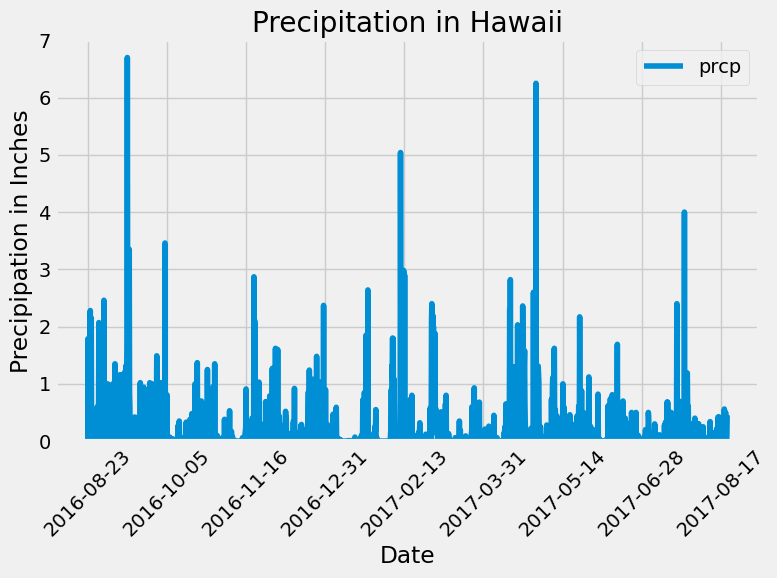

In [13]:
# Use Pandas Plotting with Matplotlib to plot the data
measurement_df_final.plot(figsize=(8,6),ylim=(0,7),title="Precipitation in Hawaii")
plt.xlabel("Date")
plt.ylabel("Precipipation in Inches")
plt.xticks(rotation=45)
plt.tight_layout()


In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation datame
measurement_df_final.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
count_station=session.query(Station.id).count()
print(f"The total number of stations is: {count_station}")

The total number of stations is: 9


In [16]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations= session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).\
                                                                                                 desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [17]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = 'USC00519281'
sel= [Measurement.station,func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)]
temp_active= session.query(*sel).filter(Measurement.station == most_active).all()
temp_active

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

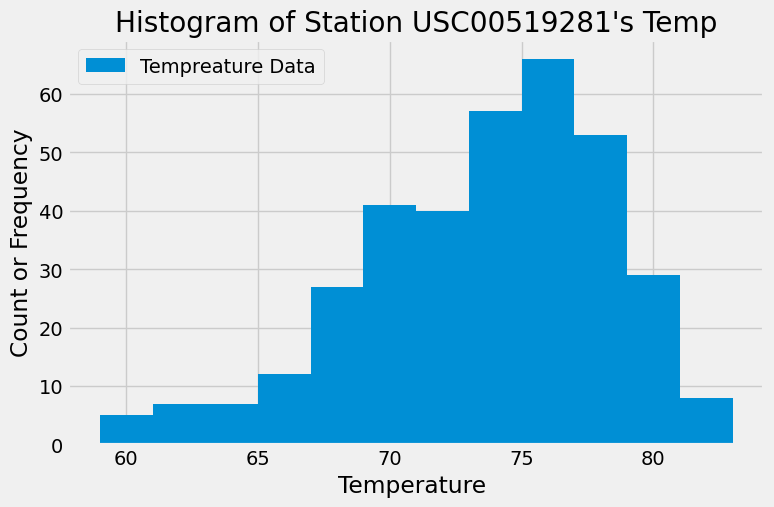

In [18]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12= session.query(Measurement.tobs).filter(Measurement.station== most_active).filter(Measurement.date>=first_date).all()
station_df=pd.DataFrame(last_12)
station_df= station_df.rename(columns={"tobs":"Tempreature Data"})


station_df.hist(bins=12,figsize=(8,5),legend="Temp Data")
plt.xlabel("Temperature ")

plt.title("Histogram of Station USC00519281's Temp")
plt.ylabel("Count or Frequency")

plt.show()

# Close session

In [19]:
# Close Session
session.close()